<a href="https://colab.research.google.com/github/Shahidulla-Vantela/SMOTE_Analysis/blob/main/SMOTE_FraudDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_excel('/content/AML.xlsx')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Laundering
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022-09-01 00:16:00,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022-09-01 00:00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


Missing Values per Column:
 Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Laundering            0
dtype: int64


In [ ]:
df.shape

(1048575, 11)

In [ ]:
df['Laundering'].value_counts()

,count
Laundering,
0,1048348
1,227


<Axes: xlabel='Laundering', ylabel='count'>

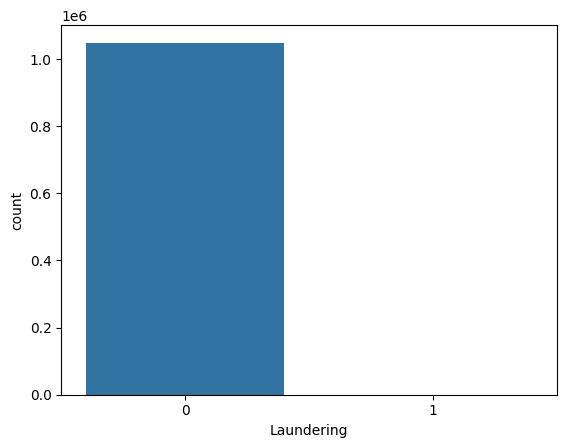

In [ ]:
sns.countplot(data=df, x='Laundering')

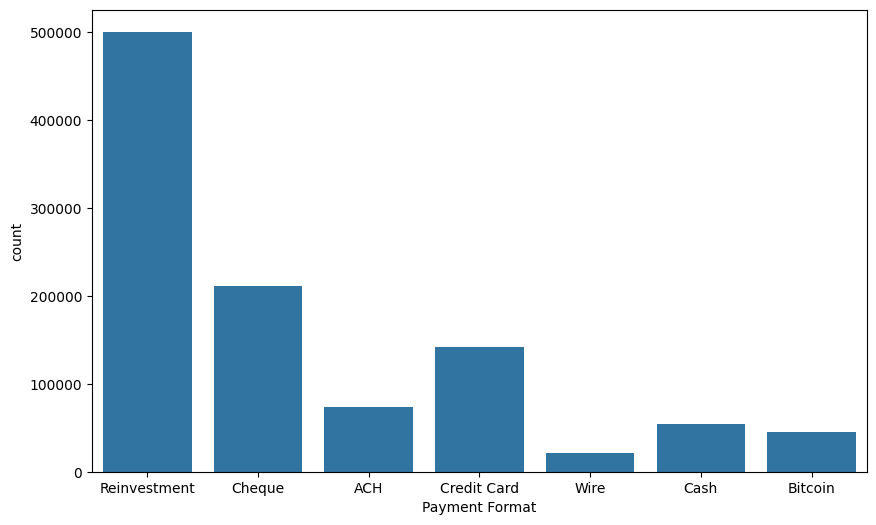

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Format')
plt.show();

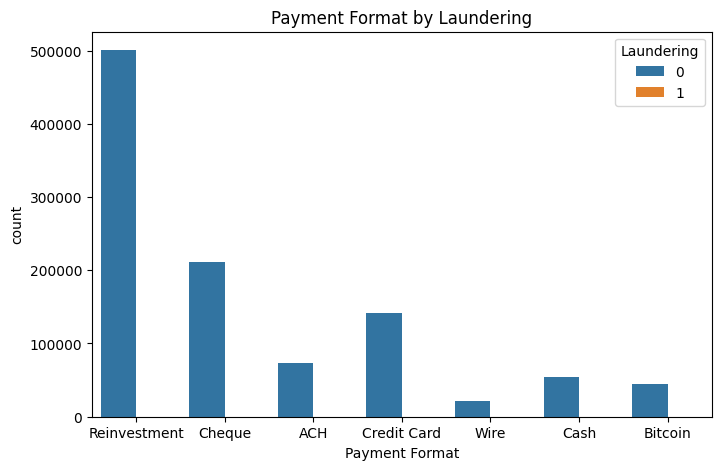

In [ ]:
# Payment Format by Laundering
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Payment Format', hue='Laundering')
plt.title("Payment Format by Laundering")
plt.show()

In [ ]:
# Convert Timestamp to datetime if not already done
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year, month, and day
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

In [ ]:
# Encode categorical columns
le = LabelEncoder()
df['Receiving Currency'] = le.fit_transform(df['Receiving Currency'])
df['Payment Currency'] = le.fit_transform(df['Payment Currency'])
df['Payment Format'] = le.fit_transform(df['Payment Format'])

In [ ]:
# Drop the original 'Timestamp' if it's no longer needed
df.drop(columns=['Timestamp', 'Account', 'Account.1'], inplace=True)

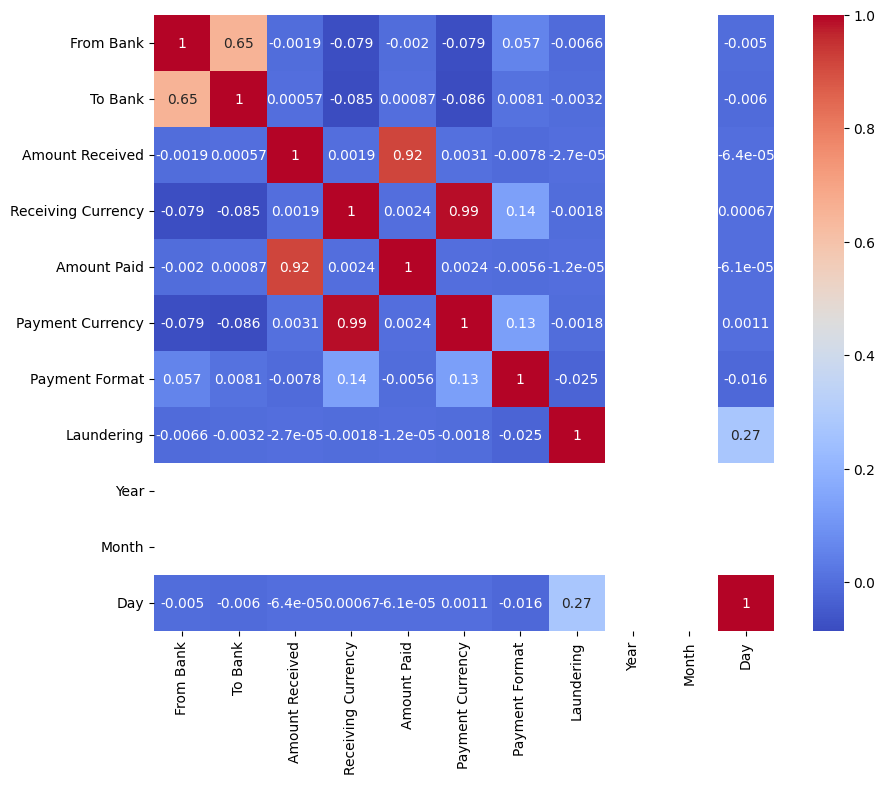

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

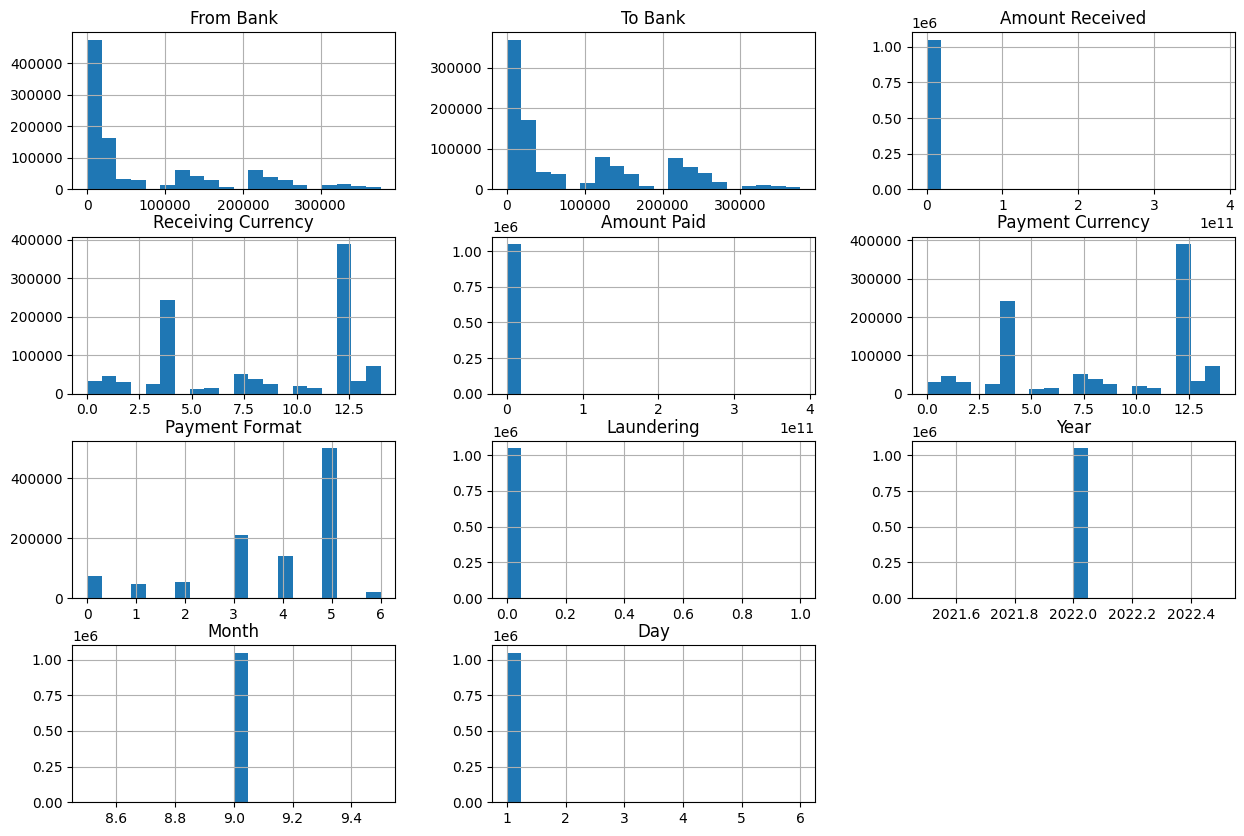

In [ ]:
# Histogram of each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
X = df.drop(['Laundering'],axis = 1)
y = df['Laundering']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Value count before SMOTE:")
print(Counter(y))
print("\nValue Count after SMOTE:")
print(Counter(y_resampled))

Value count before SMOTE:
Counter({0: 1048348, 1: 227})

Value Count after SMOTE:
Counter({0: 1048348, 1: 1048348})


In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest: 0.9546215481470883
Confusion Matrix:
 [[193029  16417]
 [  2612 207282]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    209446
           1       0.93      0.99      0.96    209894

    accuracy                           0.95    419340
   macro avg       0.96      0.95      0.95    419340
weighted avg       0.96      0.95      0.95    419340



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree: 0.9979801592979444
Confusion Matrix:
 [[208961    485]
 [   362 209532]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209446
           1       1.00      1.00      1.00    209894

    accuracy                           1.00    419340
   macro avg       1.00      1.00      1.00    419340
weighted avg       1.00      1.00      1.00    419340



In [ ]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression: 0.7956550770258024
Confusion Matrix:
 [[174430  35016]
 [ 50674 159220]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80    209446
           1       0.82      0.76      0.79    209894

    accuracy                           0.80    419340
   macro avg       0.80      0.80      0.80    419340
weighted avg       0.80      0.80      0.80    419340



In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient Boosting: 0.9439857871893929
Confusion Matrix:
 [[190129  19317]
 [  4172 205722]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    209446
           1       0.91      0.98      0.95    209894

    accuracy                           0.94    419340
   macro avg       0.95      0.94      0.94    419340
weighted avg       0.95      0.94      0.94    419340



In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("XGB:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGB: 0.9861019697620069
Confusion Matrix:
 [[204070   5376]
 [   452 209442]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    209446
           1       0.97      1.00      0.99    209894

    accuracy                           0.99    419340
   macro avg       0.99      0.99      0.99    419340
weighted avg       0.99      0.99      0.99    419340



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("KNN:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN: 0.9937735489101922
Confusion Matrix:
 [[207952   1494]
 [  1117 208777]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    209446
           1       0.99      0.99      0.99    209894

    accuracy                           0.99    419340
   macro avg       0.99      0.99      0.99    419340
weighted avg       0.99      0.99      0.99    419340



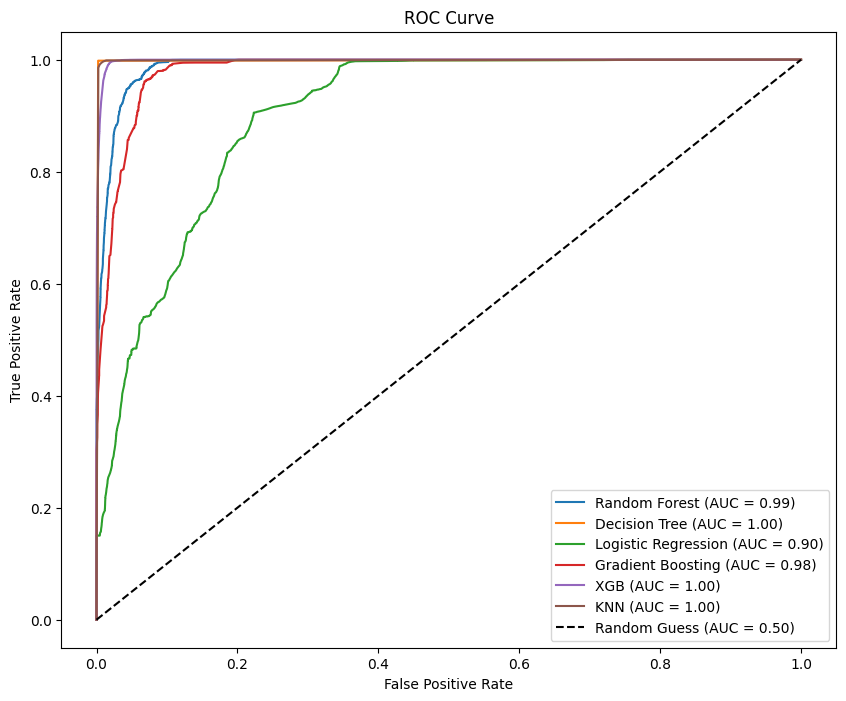

In [ ]:
#plot ROC Curve for each model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary containing your models with their names
models = {
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'Logistic Regression': logreg_model,
    'Gradient Boosting': gb_model,
    'XGB': xgb_model,
    'KNN': knn_model,
}

plt.figure(figsize=(10, 8))
for name, model_instance in models.items(): # Iterate over items to get name and model
    fpr, tpr, _ = roc_curve(y_test, model_instance.predict_proba(X_test)[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

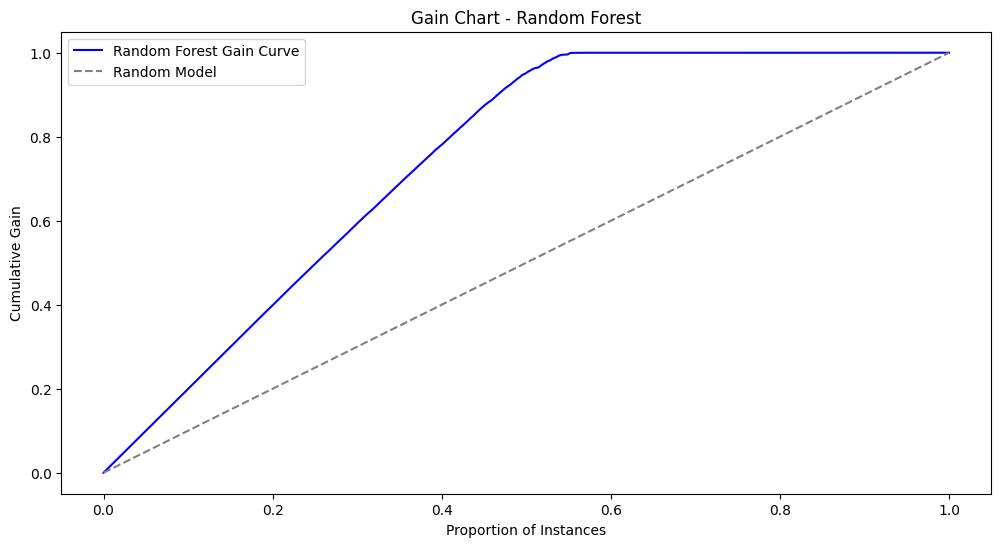

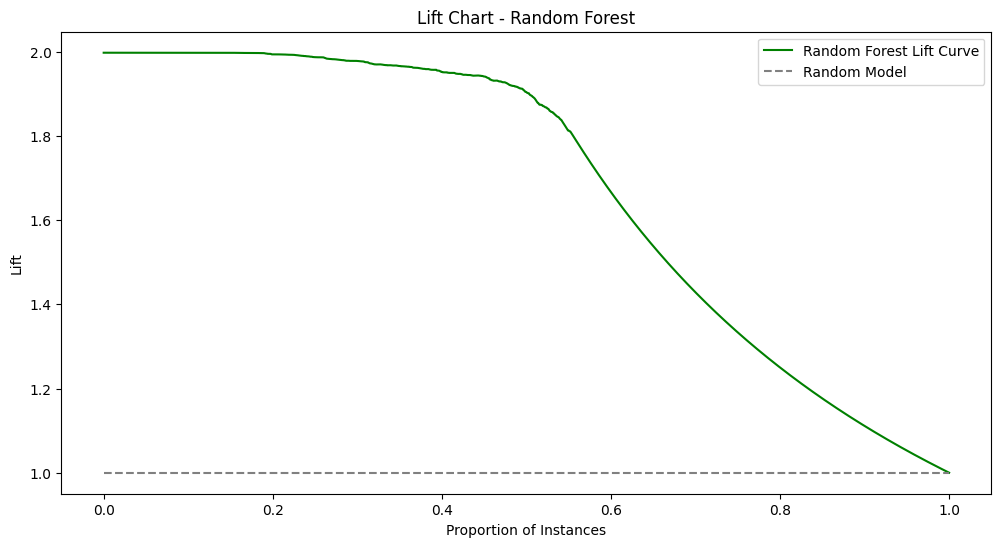

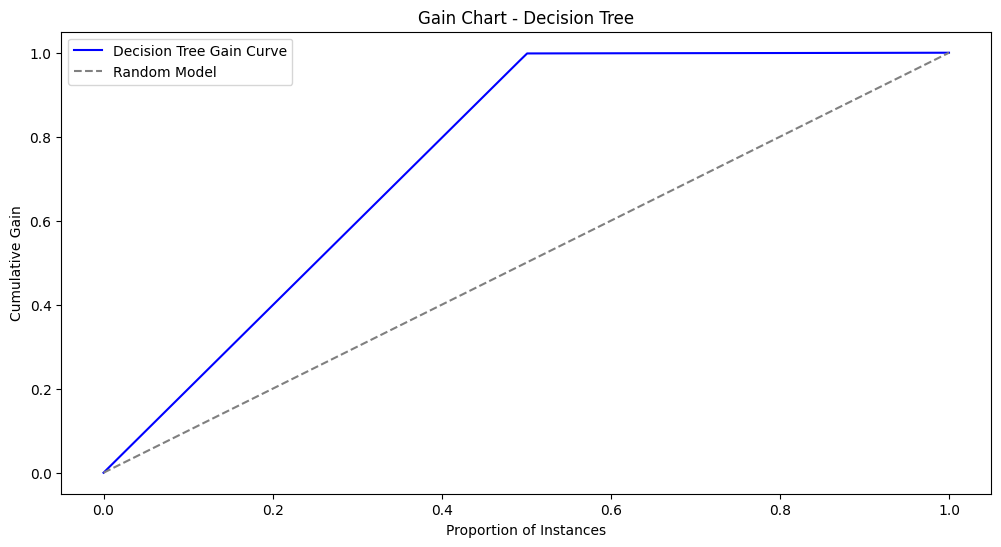

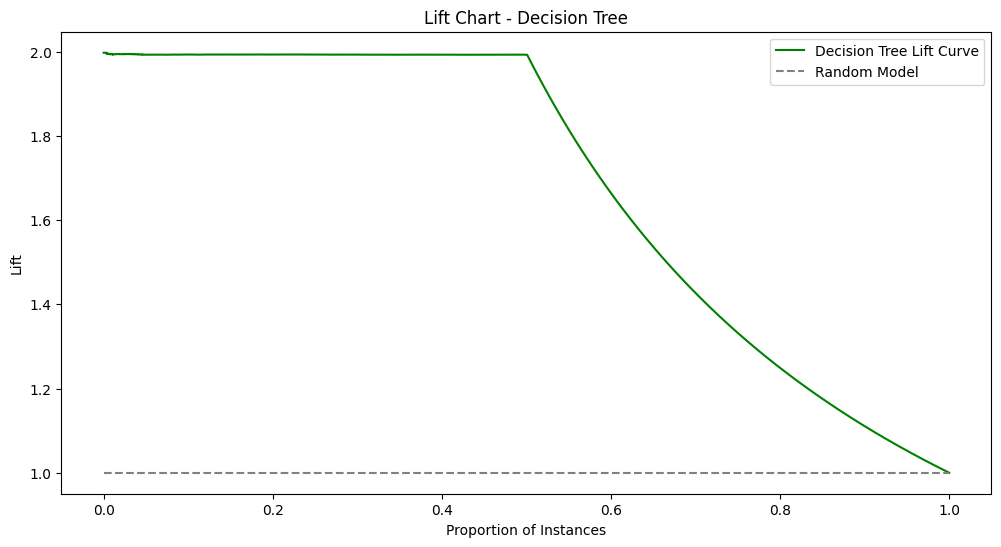

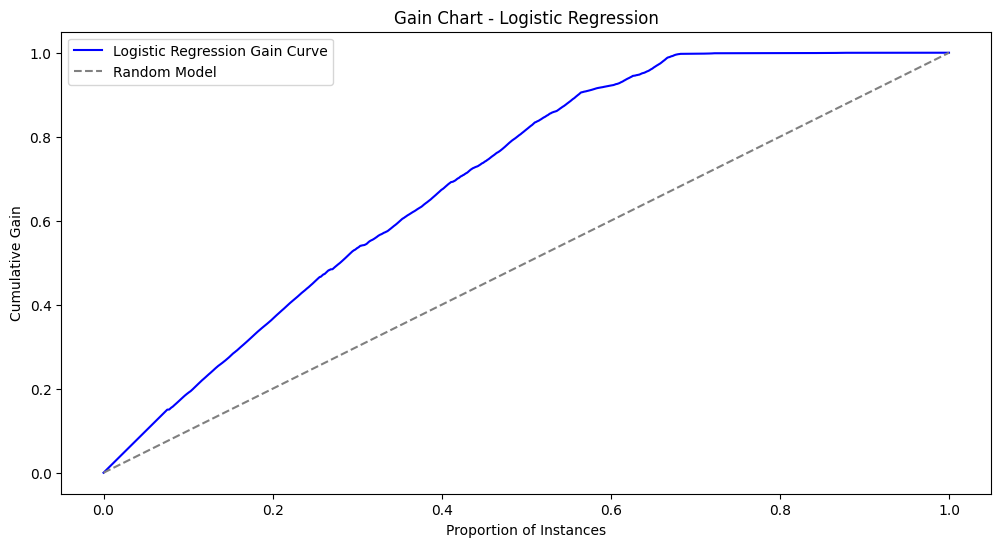

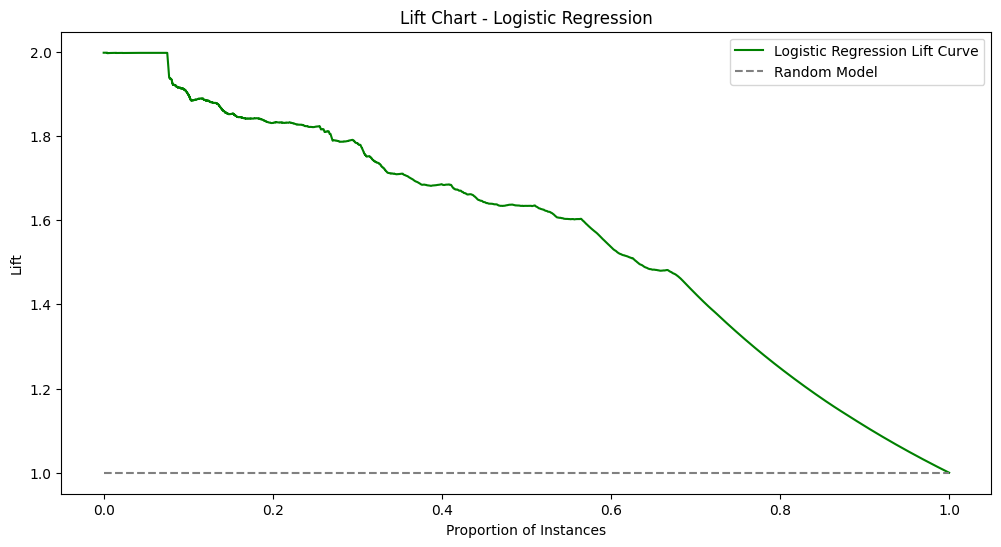

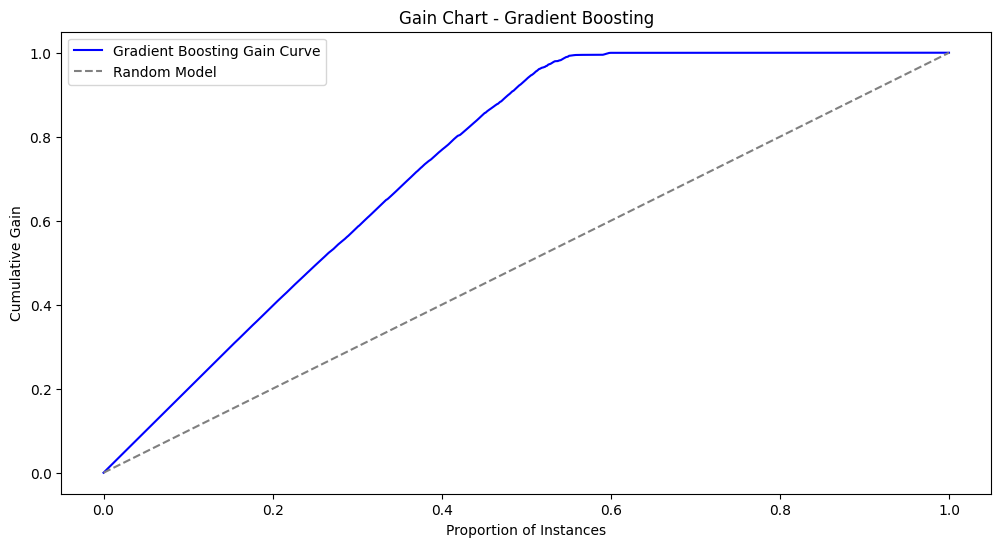

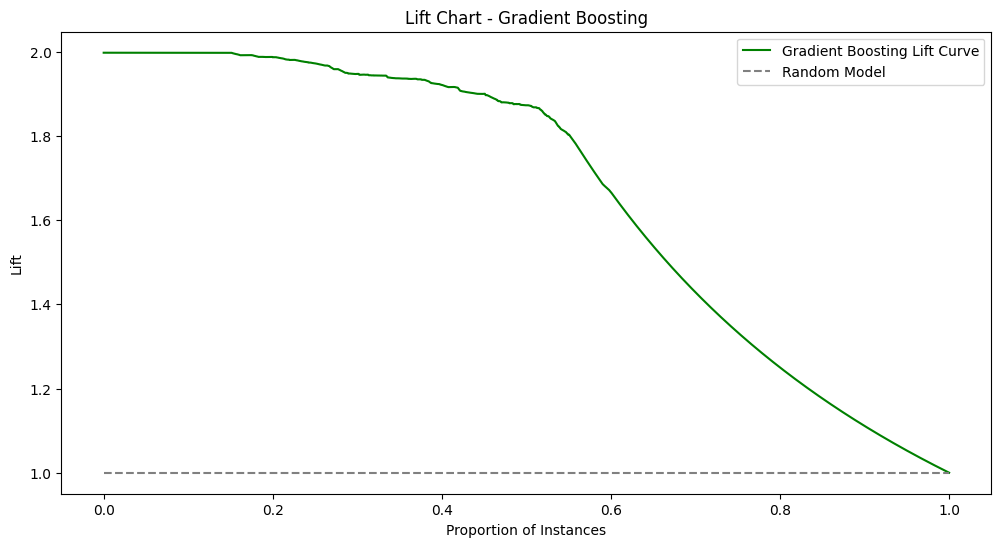

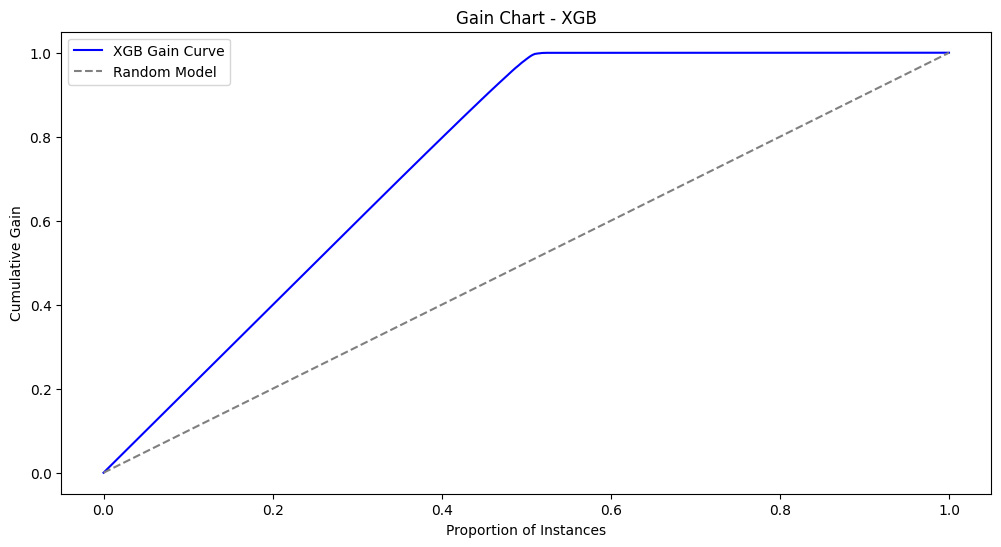

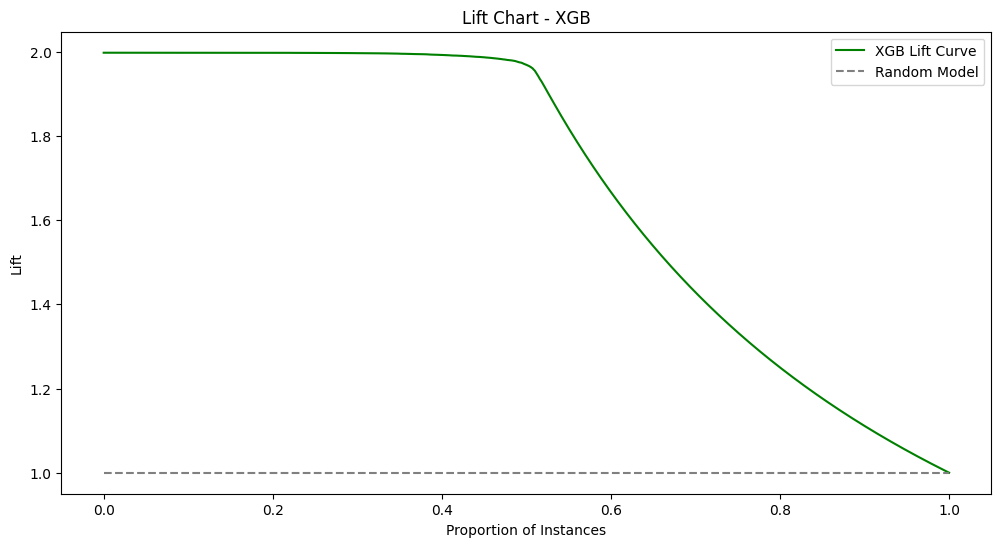

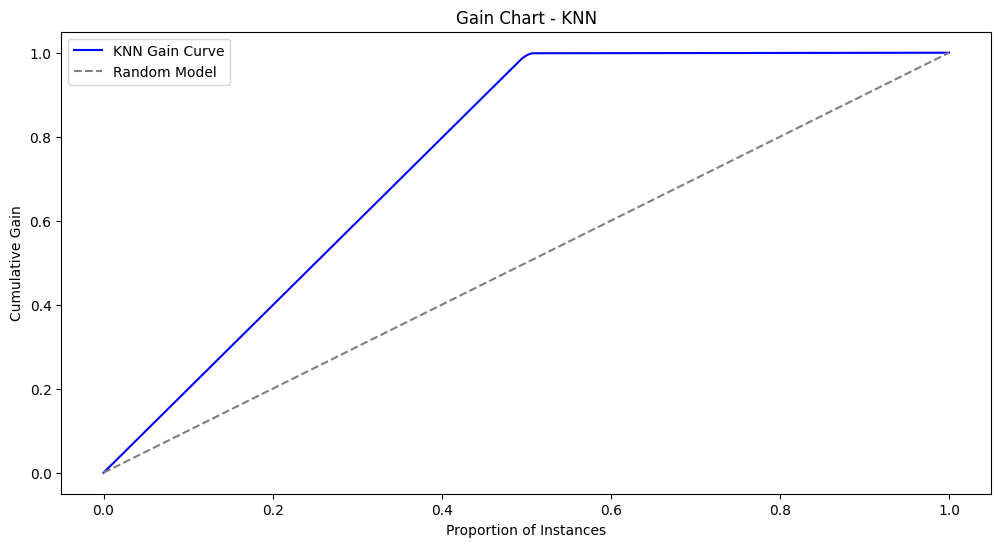

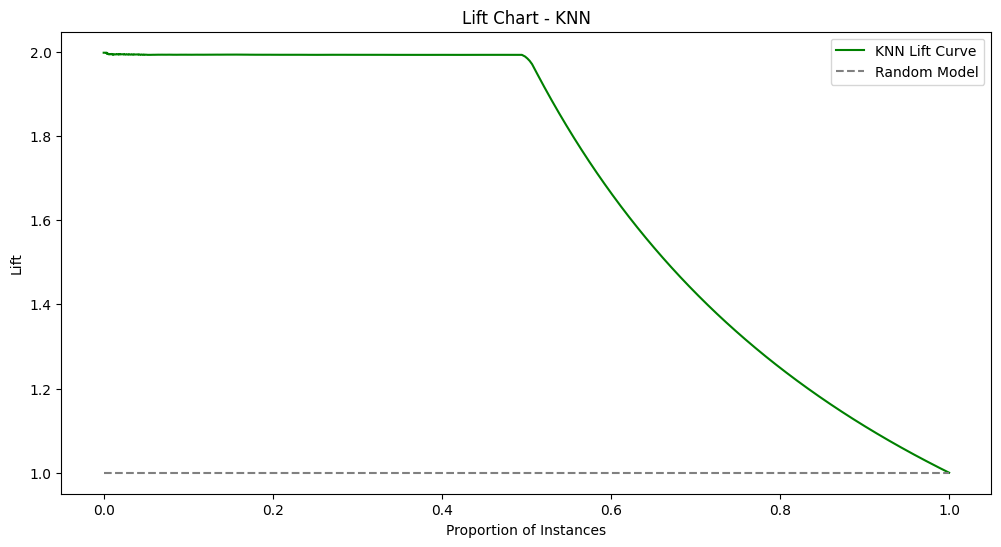

In [ ]:
#Lift and Gain Chart
def plot_lift_gain(y_test, y_pred_prob, model_name):
    # Sort the true values based on predicted probabilities in descending order
    sorted_indices = np.argsort(y_pred_prob)[::-1]

    # Reset index of y_test to ensure it aligns with sorted_indices
    y_test_reset = y_test.reset_index(drop=True)

    y_sorted = y_test_reset[sorted_indices]  # Use the reset index

    # Calculate cumulative sum of positive cases (Gain)
    cumulative_gains = np.cumsum(y_sorted) / np.sum(y_sorted)

    # Calculate the lift values
    x_percentile = np.arange(1, len(y_sorted) + 1) / len(y_sorted)
    lift = cumulative_gains / x_percentile

    # Plot Gain Chart
    plt.figure(figsize=(12, 6))
    plt.plot(x_percentile, cumulative_gains, label=f"{model_name} Gain Curve", color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Model')
    plt.xlabel('Proportion of Instances')
    plt.ylabel('Cumulative Gain')
    plt.title(f"Gain Chart - {model_name}")
    plt.legend()
    plt.show()

    #Plot the lift chart
    plt.figure(figsize=(12, 6))
    plt.plot(x_percentile, lift, label=f"{model_name} Lift Curve", color='green')
    plt.plot([0, 1], [1, 1], color='gray', linestyle='--', label='Random Model')
    plt.xlabel('Proportion of Instances')
    plt.ylabel('Lift')
    plt.title(f"Lift Chart - {model_name}")
    plt.legend()
    plt.show()

# Plot lift and gain charts for all models with predict_proba
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        plot_lift_gain(y_test, model.predict_proba(X_test)[:, 1], model_name)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_model_performance_report(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #roc_auc = roc_auc_score(y_true, y_pred) # Include if you want ROC AUC
    conf_matrix = confusion_matrix(y_true, y_pred)

    report = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        #"ROC AUC": roc_auc,  # Include if you want ROC AUC
        "Confusion Matrix": conf_matrix
    }
    return report

# Now you can call the function as in your original code
performance_summary = get_model_performance_report(y_test, y_pred)
print(performance_summary)

{'Accuracy': 0.9937735489101922, 'Precision': 0.9928948832696853, 'Recall': 0.9946782661724489, 'F1-Score': 0.9937857746361548, 'Confusion Matrix': array([[207952,   1494],
       [  1117, 208777]])}


In [ ]:
import pandas as pd
# Assuming 'y' is your Series and 'X_test' is your DataFrame

# Convert X_test to a pandas DataFrame
X_test = pd.DataFrame(X_test)

# Ensure 'predicted_laundering' column is created if not present
if 'predicted_laundering' not in X_test.columns:
    X_test['predicted_laundering'] = 0  # Initialize with 0 if column doesn't exist

    #Now you can slice and assign safely
    X_test['predicted_laundering'] = y.values[:X_test.shape[0]]

    #Add an alert message for each transaction(laundering==1)
    X_test['alert_message'] = X_test['predicted_laundering'].apply(lambda x: 'Alert: Suspicious Transaction Detected' if x==1 else 'No Alert')

    #Display the transaction with Alert
    alert = X_test[X_test['predicted_laundering']==1]
    print(alert[['alert_message']])

    # Corrected: Using 'alert' instead of 'alerts'
    alert = X_test[X_test['predicted_laundering']==1]
    print(alert[['alert_message']]) # Using the correct variable name 'alert'

                                 alert_message
38272   Alert: Suspicious Transaction Detected
39028   Alert: Suspicious Transaction Detected
50683   Alert: Suspicious Transaction Detected
127003  Alert: Suspicious Transaction Detected
136967  Alert: Suspicious Transaction Detected
155287  Alert: Suspicious Transaction Detected
197981  Alert: Suspicious Transaction Detected
198739  Alert: Suspicious Transaction Detected
276018  Alert: Suspicious Transaction Detected
281697  Alert: Suspicious Transaction Detected
341765  Alert: Suspicious Transaction Detected
345901  Alert: Suspicious Transaction Detected
397738  Alert: Suspicious Transaction Detected
404980  Alert: Suspicious Transaction Detected
                                 alert_message
38272   Alert: Suspicious Transaction Detected
39028   Alert: Suspicious Transaction Detected
50683   Alert: Suspicious Transaction Detected
127003  Alert: Suspicious Transaction Detected
136967  Alert: Suspicious Transaction Detected
155287  Alert